# Correlate mRNA and WES tumour cellularity values

Script related to figure s1b

### Aim:
- Plot correlation of WES and mRNA derived tumour cellularity values

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [4]:
file_keys = home + 'Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [5]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


### Define sample colours

In [6]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

### Define sample markers

In [7]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [8]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


## Load mRNA tumour cellularity data

In [9]:
mRNA_tumcell_file = home + "Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt"

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

In [10]:
mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,213.898183,441.185072,627.161634,-257.879171,-105.932457,-179.742309,-667.871861,-554.187271,-467.547274,-424.048973,...,276.215651,819.700176,542.094611,446.049523,100.214812,640.683420,1028.302292,631.494907,843.594952,-393.705822
ImmuneScore,789.397143,1103.963967,996.569838,119.238243,354.124225,197.378769,-395.243536,-16.422432,-469.452988,-563.011739,...,-18.442529,526.734281,-25.089182,238.412959,-60.730519,890.081437,776.296638,680.327079,892.726571,-226.504212
ESTIMATEScore,1003.295326,1545.149039,1623.731472,-138.640928,248.191767,17.636459,-1063.115397,-570.609703,-937.000262,-987.060713,...,257.773122,1346.434456,517.005428,684.462482,39.484294,1530.764858,1804.598930,1311.821985,1736.321523,-620.210034
TumorPurity,0.730147,0.673548,0.664978,0.833913,0.801248,0.821034,0.900910,0.867208,0.892722,0.896009,...,0.800405,0.694819,0.777021,0.761314,0.819199,0.675108,0.644917,0.698464,0.652544,0.870811


In [11]:
sample_labels['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity']

### Plot correlation

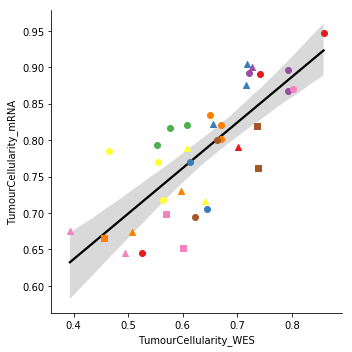

In [12]:
g = sns.lmplot(x='TumourCellularity_WES',
               y='TumourCellularity_mRNA',
               data=sample_labels,
               truncate=True,
               scatter_kws={'color':'None'},
               line_kws={'color':'k',
                         'zorder':0})

for sample in sample_labels.index:
    
    wes_tumcell = sample_labels.TumourCellularity_WES[sample]
    rna_tumcell = sample_labels.TumourCellularity_mRNA[sample]
    colour = sample_labels.Colour[sample]
    marker = sample_labels.Site_marker[sample]
    
    plt.scatter(wes_tumcell,
                rna_tumcell,
                marker=marker,
                c=colour,
                zorder=1)
    
sns.despine(trim=False)

### Save plot

In [13]:
ls ../../Figures/main/1/

OVCT_Fig_m1.pdf  OVCT_Fig_m1.png  README.md        panels/


In [14]:
FILE = "../../Figures/supplementary/1/panels/s1b_TreatmentNaive_TumourCellularity_WES_mRNA_corr.pdf"

g.savefig(FILE, bbox='tight')

### Calculate normality of distribution

In [15]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

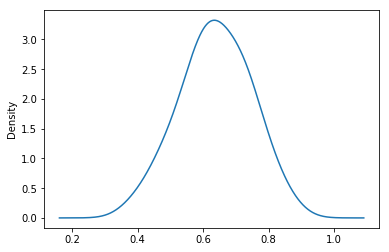

In [16]:
sample_labels["TumourCellularity_WES"].dropna().plot(kind="kde")

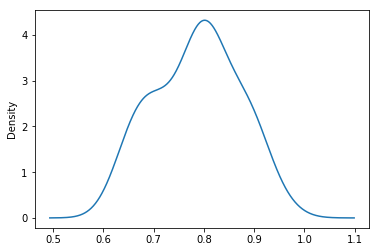

In [17]:
sample_labels["TumourCellularity_mRNA"].dropna().plot(kind="kde")

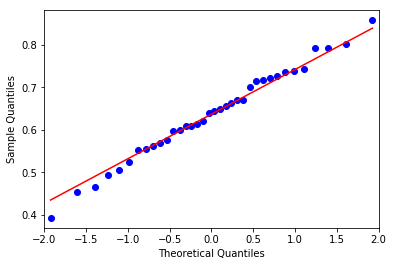

In [19]:
qqplot(sample_labels["TumourCellularity_WES"].dropna(),
       line='s')

plt.show()

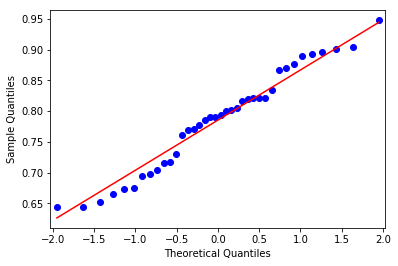

In [20]:
qqplot(sample_labels["TumourCellularity_mRNA"].dropna(),
       line='s')

plt.show()

In [21]:
scipy.stats.shapiro(sample_labels["TumourCellularity_WES"].dropna())

# Looks normal

(0.9907388091087341, 0.9883953928947449)

In [22]:
scipy.stats.shapiro(sample_labels["TumourCellularity_mRNA"].dropna())

# Looks normal

(0.9616340398788452, 0.2144736647605896)

In [23]:
scipy.stats.normaltest(sample_labels["TumourCellularity_WES"].dropna())

# Looks normal

NormaltestResult(statistic=0.20407543126534242, pvalue=0.9029954939802725)

In [24]:
scipy.stats.normaltest(sample_labels["TumourCellularity_mRNA"].dropna())

# Looks normal

NormaltestResult(statistic=2.594404545802352, pvalue=0.2732953302029545)

In [25]:
scipy.stats.anderson(sample_labels["TumourCellularity_WES"].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=0.13777017781481504, critical_values=array([0.528, 0.601, 0.721, 0.841, 1.   ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [26]:
scipy.stats.anderson(sample_labels["TumourCellularity_mRNA"].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=0.44562252003415637, critical_values=array([0.529, 0.603, 0.723, 0.844, 1.004]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [27]:
scipy.stats.bartlett(
    sample_labels["TumourCellularity_mRNA"].dropna(),
    sample_labels["TumourCellularity_WES"].dropna()
)

# same variance (homoscedasticity)

BartlettResult(statistic=2.2594286400006784, pvalue=0.13280305044469412)

Conclusion: Use pearson

### Calculate correlation

In [29]:
scipy.stats.pearsonr

<function scipy.stats.stats.pearsonr>

In [30]:
scipy.stats.pearsonr(
    list(sample_labels.dropna()['TumourCellularity_WES']),
    list(sample_labels.dropna()['TumourCellularity_mRNA'])
)

(0.7845388088425139, 1.4940261848767453e-08)

In [31]:
kendalltau(list(sample_labels.dropna()['TumourCellularity_WES']),
           list(sample_labels.dropna()['TumourCellularity_mRNA']))

KendalltauResult(correlation=0.5682539682539683, pvalue=1.0810507627276314e-06)

### Save data

In [32]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES,TumourCellularity_mRNA
Well,,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973,0.730147
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065,0.673548
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551,0.664978
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496,0.833913
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706,0.801248


### Assign High/Low based on median mRNA Tumor Cellularity

In [33]:
sample_labels['mRNA_binary_TumourCellularity'] = (sample_labels['TumourCellularity_mRNA'] > sample_labels['TumourCellularity_mRNA'].median()).replace([True,False],['High','Low'])

sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES,TumourCellularity_mRNA,mRNA_binary_TumourCellularity
Well,,,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973,0.730147,Low
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065,0.673548,Low
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551,0.664978,Low
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496,0.833913,High
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706,0.801248,High


In [35]:
FILE = "../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity_mRNAtumourCellularity.txt"

sample_labels.to_csv(FILE, sep='\t')

# End script